# EDA - Exploratory Data Analysis

In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm  import tqdm

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils
import torch.backends.cudnn as cudnn

from pytvision.transforms import transforms as mtrans
from pytvision import visualization as view
from pytvision.datasets.datasets  import Dataset
#from pytvision.datasets.factory  import FactoryDataset

from torchcls.datasets.factory import FactoryDataset

plt.ion()   # interactive mode

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
DATASET_PATH = '/.datasets'
DATASET_NAME = FactoryDataset.Datasets.MNIST

print("Selected dataset {} in {}".format(DATASET_NAME.to_str(), DATASET_PATH))

Selected dataset mnist in /.datasets


In [14]:
dataloader = Dataset(
    data=FactoryDataset.factory(
        pathname=DATASET_PATH, 
        name=DATASET_NAME, 
        subset=FactoryDataset.Subsets.VAL, 
        download=True),
    num_channels=3,
    transform=transforms.Compose([
        mtrans.ToResize( (48, 48), resize_mode='squash', padding_mode=cv2.BORDER_REPLICATE ),
        mtrans.ToTensor(),
        mtrans.ToWhiteNormalization(),
        ])
    )

print(len( dataloader.data.classes ))
print( dataloader.data.class_to_idx )

10
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
49


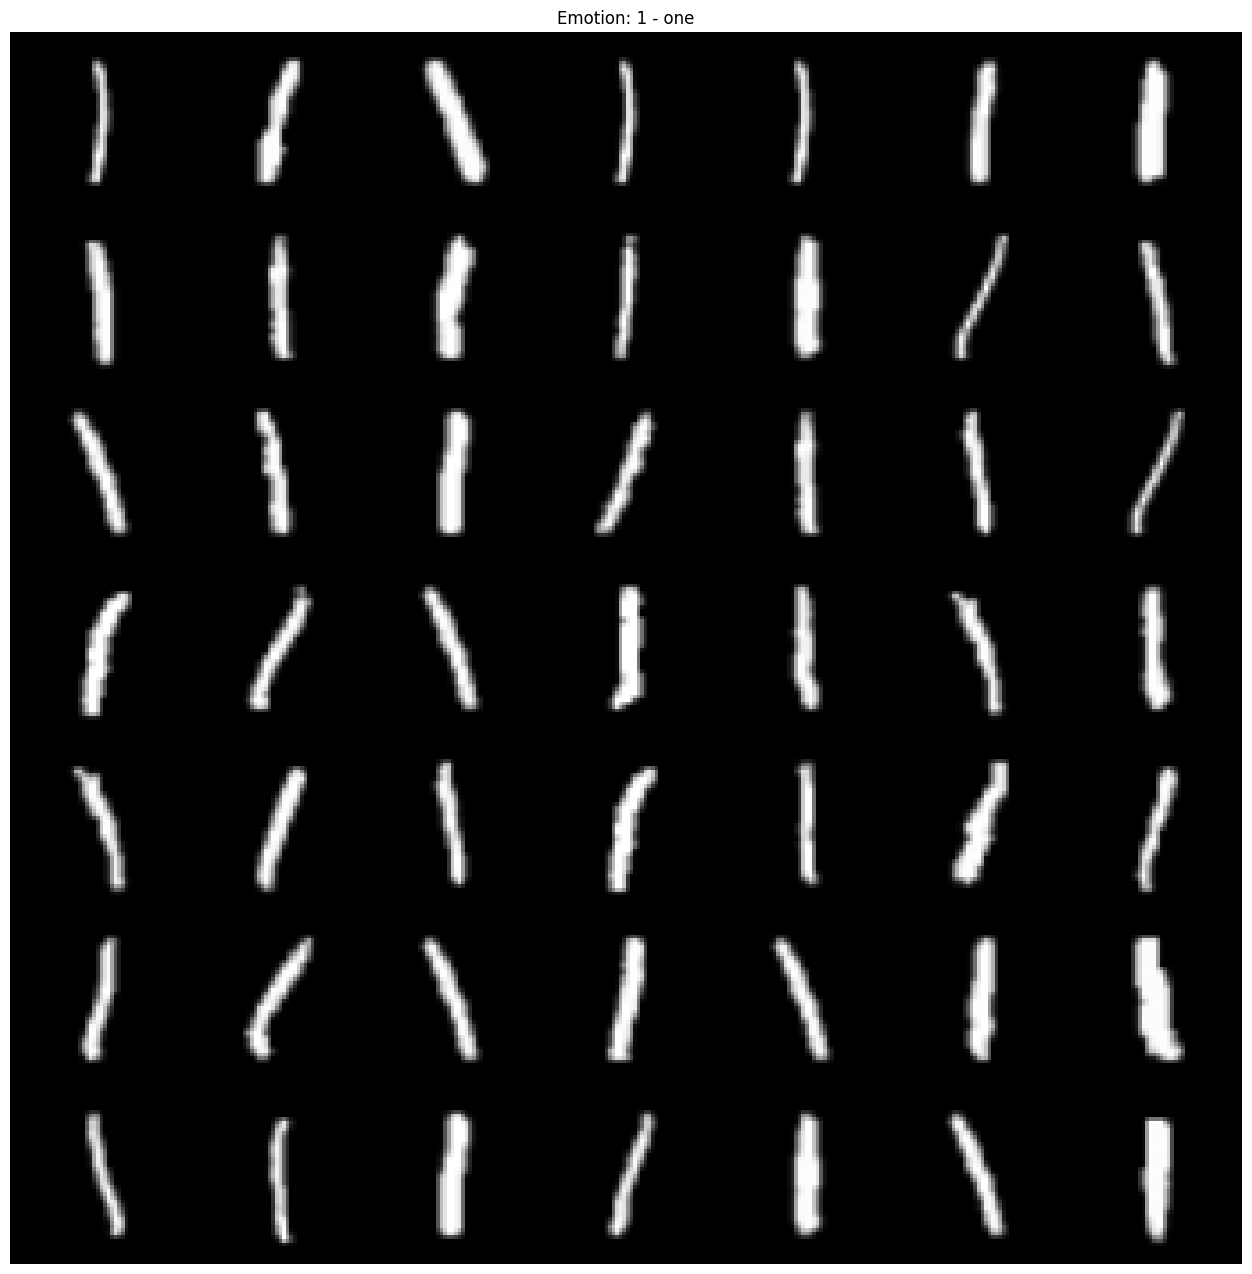

In [15]:
num=48
classes_select = 1
dataloader_select = []
k=0
labels = dataloader.labels
imsize = 48

for i in range( len(dataloader) ):
    if labels[i] != classes_select: 
        continue        
    dataloader_select.append(dataloader[i]); k+=1
    if k > num: break;

n = len(dataloader_select)
print(dataloader.data.classes)
print(n)

plt.figure( figsize=(16,16))
view.visualizatedataset(dataloader_select, num=n, imsize=(imsize,imsize,3) )
plt.title('Emotion: {}'.format( dataloader.data.classes[ classes_select ] ) )
plt.axis('off')
plt.ioff()
plt.show() 

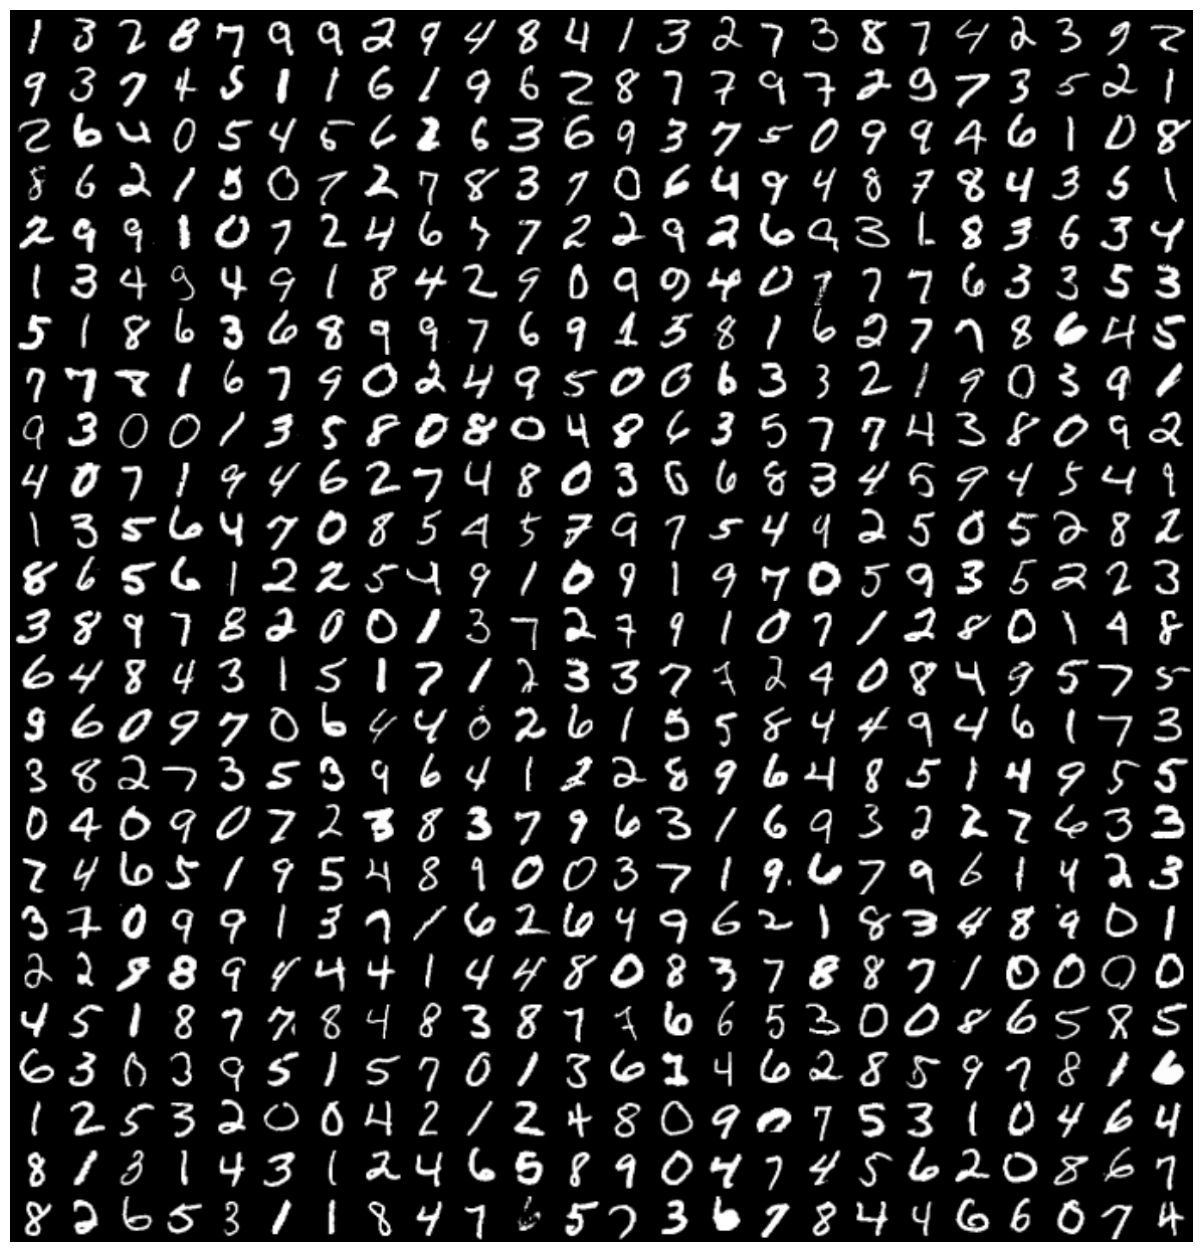

In [16]:
plt.figure( figsize=(16,16))
view.visualizatedataset(dataloader, num=600, imsize=(imsize,imsize,3) )
plt.axis('off')
plt.ioff()
plt.show() 

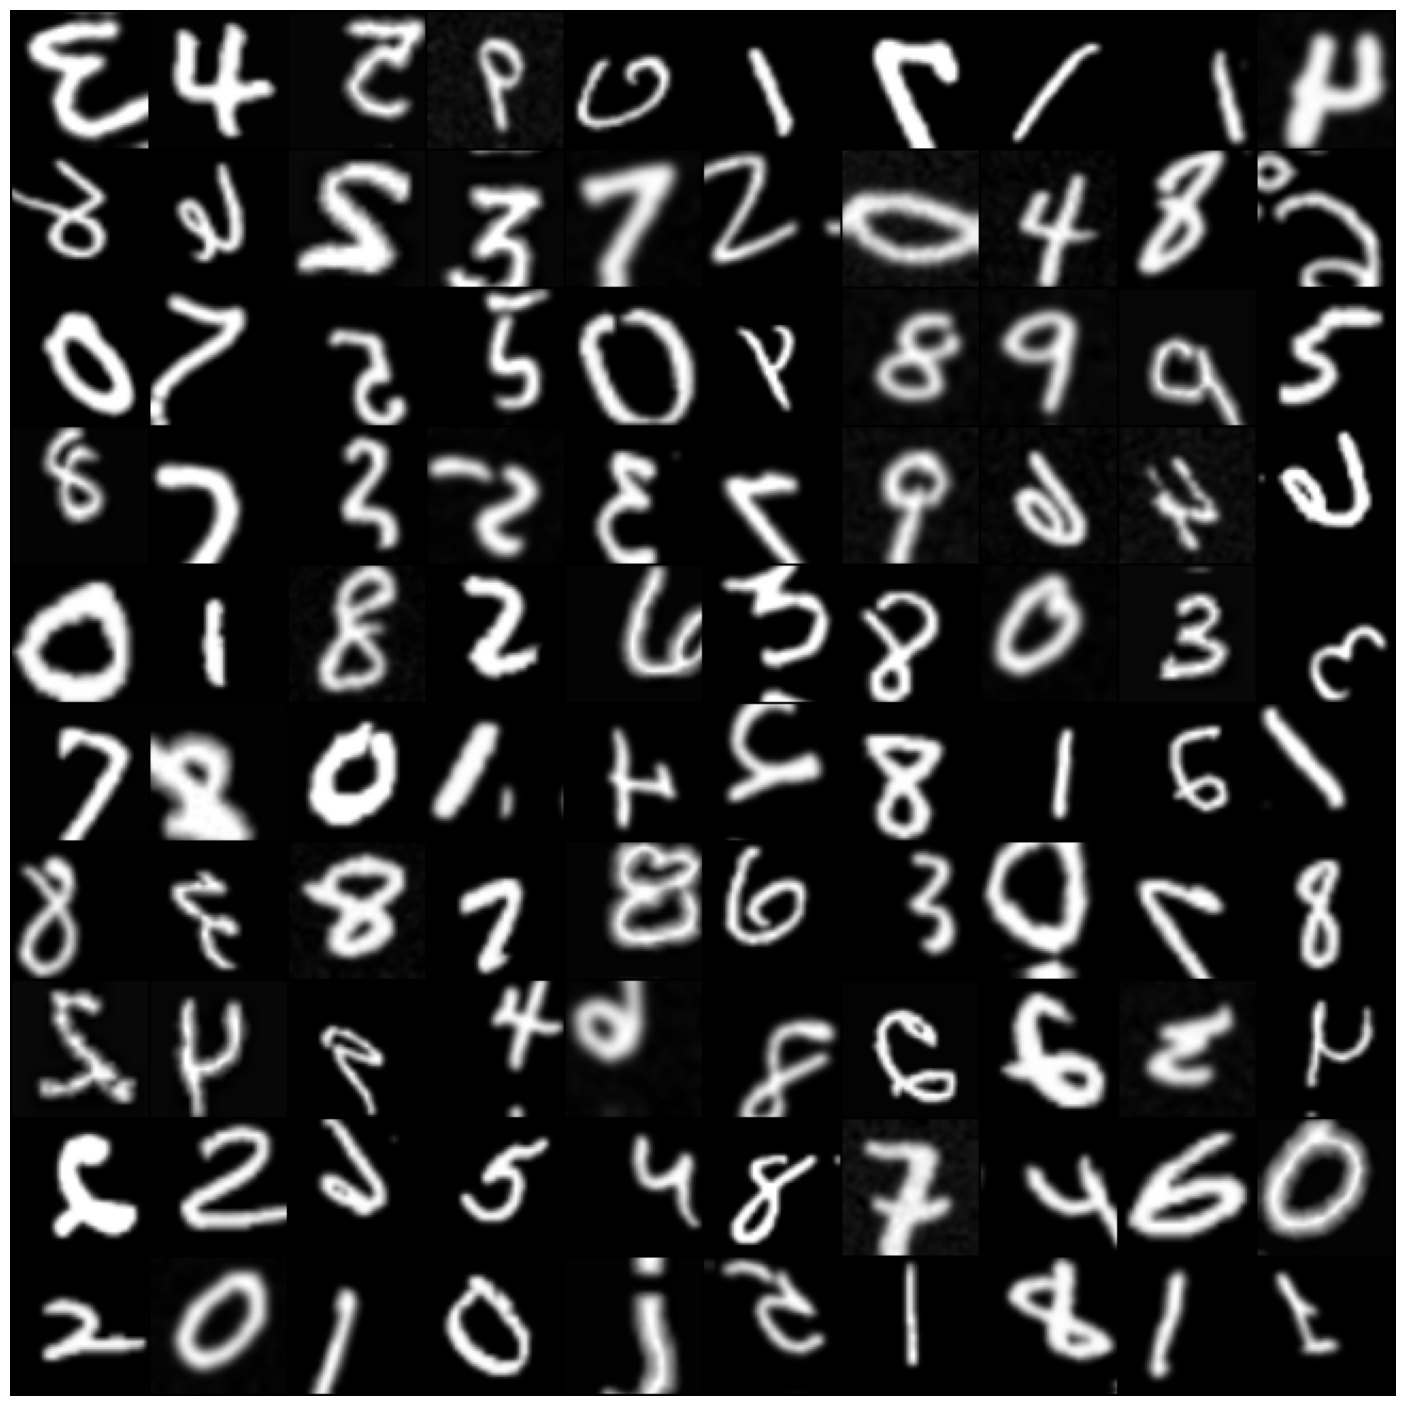

In [17]:

size_input = 64

dataloader = Dataset(
    data=FactoryDataset.factory(
        pathname=DATASET_PATH, 
        name=DATASET_NAME, 
        subset=FactoryDataset.Subsets.VAL, 
        download=True),
    num_channels=3,
    transform=transforms.Compose([
    
    mtrans.ToResize( (48, 48), resize_mode='square', padding_mode=cv2.BORDER_REFLECT ) ,
        
    mtrans.RandomScale(factor=0.2, padding_mode=cv2.BORDER_REFLECT ), 
    mtrans.ToRandomTransform( mtrans.RandomGeometricalTransform( angle=30, translation=0.2, warp=0.02, padding_mode=cv2.BORDER_REFLECT ), prob=0.5 ),
    mtrans.ToRandomTransform( mtrans.VFlip(), prob=0.5 ),
    
    #------------------------------------------------------------------
           
    mtrans.ToRandomTransform( mtrans.RandomBrightness( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomContrast( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomGamma( factor=0.25 ), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.RandomRGBPermutation(), prob=0.50 ),
    mtrans.ToRandomTransform( mtrans.CLAHE(), prob=0.25 ),
    mtrans.ToRandomTransform( mtrans.ToGaussianBlur( sigma=0.05 ), prob=0.25 ),
      
    #mtrans.RandomRGBPermutation(),
    #mtrans.ToRandomChoiceTransform( [
    #    mtrans.RandomBrightness( factor=0.15 ), 
    #    mtrans.RandomContrast( factor=0.15 ),
    #    #mtrans.RandomSaturation( factor=0.15 ),
    #    mtrans.RandomHueSaturation( hue_shift_limit=(-5, 5), sat_shift_limit=(-11, 11), val_shift_limit=(-11, 11) ),
    #    mtrans.RandomGamma( factor=0.30  ),        
    #    mtrans.ToRandomTransform(mtrans.ToGrayscale(), prob=0.15 ),
    #    ]),    
    
    #mtrans.ToRandomTransform(mtrans.ToGaussianBlur( sigma=0.00001), prob=0.50 ),    
    
    mtrans.ToResize( (size_input+5, size_input+5), resize_mode='square', padding_mode=cv2.BORDER_REFLECT  ) ,
    mtrans.RandomCrop( (size_input, size_input), limit=2, padding_mode=cv2.BORDER_REFLECT  ) , 
    
    #------------------------------------------------------------------
    mtrans.ToGrayscale(),
    mtrans.ToTensor(),
    mtrans.ToWhiteNormalization(),
    ])
    )


plt.figure( figsize=(18,18) )
view.visualizatedataset(dataloader, num=100, imsize=(size_input,size_input,3), padding=1 )

plt.axis('off')
plt.ioff()
plt.show()

